In [1]:
import keras
from keras.datasets import mnist
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.compat.v1.keras.optimizers import RMSprop

In [2]:
# Carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
# Quantas imagens eu tenho para treino?
print("Quantidade de imagens para treino:", len(x_treino)) # 60000

# Quantas imagens eu tenho para teste?
print("Quantidade de imagens para teste:", len(x_teste)) # 10000

# Qual o tipo de x_treino?
print("Tipo do x_treino:", type(x_treino))

# Pegando a primeira imagem
primeira_imagem = x_treino[0]
representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 representa:", representacao_primeira_imagem)

# Qual o formato da primeira da primeira imagem?
print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem.shape))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo do x_treino: <class 'numpy.ndarray'>
O que a imagem 0 representa: 5
Formato da primeira imagem: (28, 28) <class 'tuple'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242

Essa imagem representa: 5


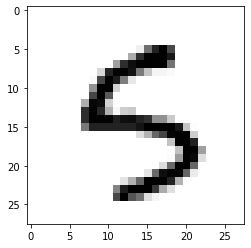

In [4]:
# Exibindo a imagem

import matplotlib.pyplot as plt

"""
for indice in range(60000):
  print("Essa imagem representa:", y_treino[indice])
  plt.imshow(x_treino[indice])
  plt.show()
"""

indice = 15000

print("Essa imagem representa:", y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [5]:
# Achatando as matrizes de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # Irá trazer (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [6]:
# Normalização dos dados
# 255 vira 1
# 127 vira 0.5
# 0 vira 0
# E assim por diante

# print(type(x_treino[0]))
# print(x_treino[0])

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

print(type(x_treino[0][350]))
print(x_treino[0][350])

<class 'numpy.float32'>
0.27450982


In [ ]:
# Visualizando os dados normalizados

print("Dados normalizados:", x_treino[0])

In [12]:
# Camada de saída (output)

valores_unicos = set(y_treino)
quantidade_valores_unicos = len(valores_unicos)

print(valores_unicos)
print(quantidade_valores_unicos)

# Transformação dos valores únicos em variáveis CATEGÓRICAS

# Preço da casa, 150k, 200k, 232k -> Variável numérica
# Tamanho da casa: 100m², 200m² -> Variável numérica
# Tamanho da casa em categorias: casas pequenas, médias e grandes -> Variável categórica

# Representação categórica de um número na rede neural
# Número 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Número 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ...
# Número 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# Criando o modelo da rede neural

model = Sequential()

# Primeira hidden layer com 30 neurônios e função de ativação ReLU
# Na primeira camada, precisamos informar o input shape, que no caso (784,)
model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicionamos um regularizador, que ajuda a evitar o overfitting. No caso, será o Dropout
model.add(Dropout(0.2))

# Segunda hidden layer com 20 neurônios e função ativação ReLU
model.add(Dense(20, activation='relu'))

# Mais uma regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de saída (output), informando a quantidade de valores únicos
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Exibe o resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compila o modelo

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [15]:
# Treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size = 128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8973 - accuracy: 0.7148 - val_loss: 0.3242 - val_accuracy: 0.9088
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4770 - accuracy: 0.8587 - val_loss: 0.2507 - val_accuracy: 0.9287
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3988 - accuracy: 0.8837 - val_loss: 0.2216 - val_accuracy: 0.9365
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8957 - val_loss: 0.1977 - val_accuracy: 0.9422
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3322 - accuracy: 0.9036 - val_loss: 0.1883 - val_accuracy: 0.9442
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3143 - accuracy: 0.9099 - val_loss: 0.1776 - val_accuracy: 0.9470
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.9129 - val_loss: 0.1801 - val_accuracy: 0.9482
Epoch 

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Previsão: [[1.23946114e-13 5.80246246e-13 2.69746607e-08 1.01731565e-08
  5.16889786e-12 4.50050343e-13 3.45011702e-20 9.99999642e-01
  4.10197558e-14 3.96145964e-07]]
Previsão ajustada: [7]


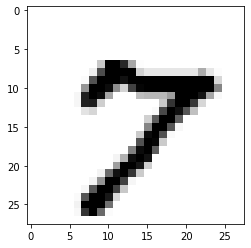

In [27]:
# Fazendo nossas previsões

indice = 9000

# Qual é o valor categórico em y_teste[indice]?
print("Valor categórico em y_teste[indice]:", y_teste[indice])

# Se for um 7, irá exibir [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

# print(x_teste[indice])

imagem = x_teste[indice].reshape((1, resolucao_total))

# print(imagem)

# Fazendo a previsão

prediction = model.predict(imagem)
print("Previsão:", prediction)

#prediction_class = model.predict_classes(imagem)

import numpy as np

prediction_class = np.argmax(model.predict(imagem), axis=-1)
print("Previsão ajustada:", prediction_class)

# Apenas para visualizar a imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)

Digite um índice entre 0 e 10000
500
Valor categórico em y_teste[indice]: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Previsão: [[3.34286039e-13 1.79777881e-08 8.37235259e-09 9.99802172e-01
  1.01555665e-11 1.97700079e-04 9.40801506e-16 1.15930172e-08
  5.01204198e-08 5.81391504e-08]]
Previsão ajustada: [3]


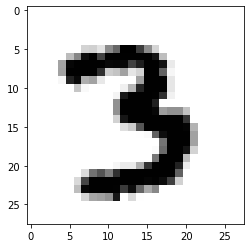

Digite um índice entre 0 e 10000
300
Valor categórico em y_teste[indice]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Previsão: [[0.00069467 0.03777099 0.04567267 0.00168048 0.22988926 0.00827911
  0.66719395 0.00155508 0.00161101 0.00565281]]
Previsão ajustada: [6]


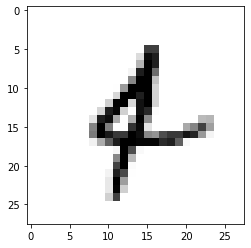

Digite um índice entre 0 e 10000
900
Valor categórico em y_teste[indice]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Previsão: [[1.1209635e-05 1.5565471e-01 2.9992436e-03 6.4056975e-01 1.9050039e-03
  1.7391472e-01 1.4415430e-04 1.3951416e-03 7.0478600e-03 1.6358238e-02]]
Previsão ajustada: [3]


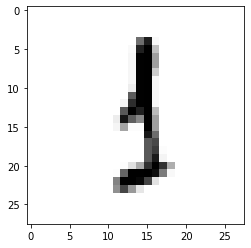

Digite um índice entre 0 e 10000
690
Valor categórico em y_teste[indice]: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Previsão: [[2.2742352e-06 2.5619920e-03 9.7934717e-01 1.7327974e-02 8.8580299e-09
  7.9637364e-05 1.7151226e-05 1.6592629e-04 4.9777701e-04 6.6711966e-12]]
Previsão ajustada: [2]


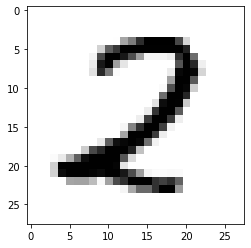

Digite um índice entre 0 e 10000


KeyboardInterrupt: ignored

In [30]:
# Fazendo nossas previsões

while True:
  print("Digite um índice entre 0 e 10000")
  indice = int(input())

  # Qual é o valor categórico em y_teste[indice]?
  print("Valor categórico em y_teste[indice]:", y_teste[indice])

  # Se for um 7, irá exibir [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

  # print(x_teste[indice])

  imagem = x_teste[indice].reshape((1, resolucao_total))

  # print(imagem)

  # Fazendo a previsão

  prediction = model.predict(imagem)
  print("Previsão:", prediction)

  #prediction_class = model.predict_classes(imagem)

  import numpy as np

  prediction_class = np.argmax(model.predict(imagem), axis=-1)
  print("Previsão ajustada:", prediction_class)

  # Apenas para visualizar a imagem
  (x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
  plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)
  plt.show()